## Objectives

* Prepare data for modeling
* Select and test the most suitable possible features

# 5.0 Data Preparation

## 5.1 Numerical Variables Preparation

In [ ]:
df5 = df4.copy()
df5.shape

(4314, 16)

### 5.1.1 Describing

In [ ]:
# df3.hist();
num_att = df5.select_dtypes(include= ['int','float'])
d1 = pd.DataFrame( num_att.min() ).T
d2 = pd.DataFrame( num_att.max() ).T
d3 = pd.DataFrame( num_att.max() - num_att.min() ).T
d4 = pd.DataFrame( num_att.mean() ).T
d5 = pd.DataFrame( num_att.median() ).T
d6 = pd.DataFrame( num_att.std() ).T
d7 = pd.DataFrame( num_att.skew() ).T
d8 = pd.DataFrame( num_att.kurtosis() ).T

desc = pd.concat( [d1, d2, d3, d4, d5, d6, d7, d8] ).T
desc.columns = ['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]
desc.style.format( "{:,.2f}" )

,min,max,range,mean,median,std,skew,kurtosis
customer_id,"12,347.00","18,287.00","5,940.00","15,301.83","15,300.50","1,720.16",0.00,-1.20
recency,1.00,374.00,373.00,93.05,51.00,100.17,1.25,0.43
avg_days_bw_purchases,0.00,366.00,366.00,50.57,31.09,65.32,1.99,4.65
num_purchases,1.00,206.00,205.00,4.26,2.00,7.66,11.95,244.12
date_range,1.00,374.00,373.00,187.22,191.00,115.01,0.01,-1.33
frequency,0.00,34.00,34.00,0.05,0.02,0.54,58.77,"3,681.78"
revenue,3.75,"278,778.02","278,774.27","1,922.49",655.34,"8,326.44",21.49,594.95
avg_ticket,3.75,"13,206.50","13,202.75",371.22,283.27,465.09,10.65,202.58
qty_items,1.00,"197,132.00","197,131.00","1,133.25",373.50,"4,701.25",22.96,778.32
avg_basket_size,0.25,"7,824.00","7,823.75",200.17,140.00,269.91,10.01,193.40


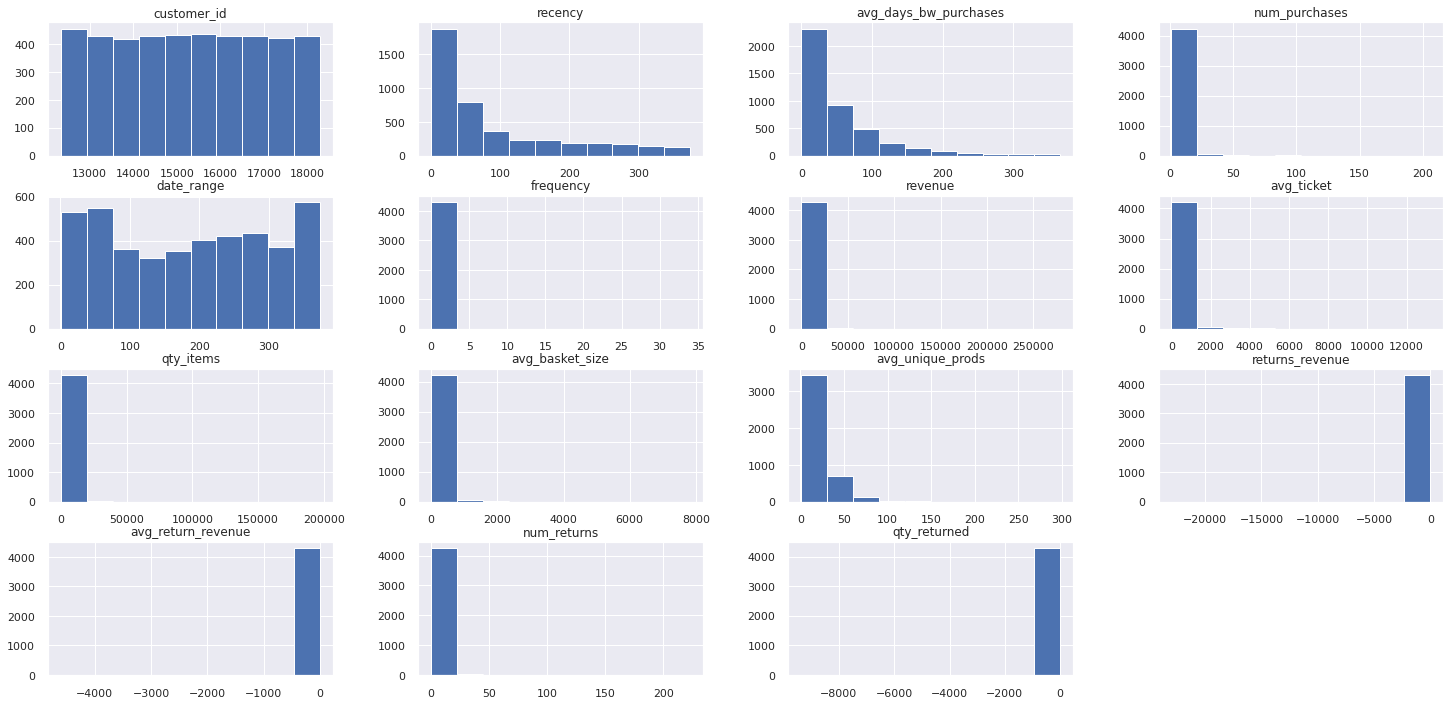

In [ ]:
df5.hist();

## 5.2 Preprocessing

In [ ]:
# selecting numerical cols, removing customer_id and country
numerical_cols = df5.select_dtypes(include = ['int', 'float'] ).columns.tolist()
numerical_cols.remove('customer_id')

# applying min max transform
ct = make_column_transformer( (MinMaxScaler(), numerical_cols) )
df_minmax = ct.fit_transform(df5)

In [ ]:
# defining columns to be transformed
log_cols = ['recency','avg_days_bw_purchases'] 
min_max_cols = ['num_purchases','date_range','frequency','revenue','qty_items', 'avg_ticket','avg_basket_size','avg_unique_prods','returns_revenue','avg_return_revenue','num_returns','qty_returned']

log1p = FunctionTransformer(np.log1p)

# applying log and standard scaler to log cols
log_pipe = Pipeline(steps = [ ('log', log1p), ('std', StandardScaler()) ] )
ct_log = ColumnTransformer( transformers = [ ('log', log_pipe, log_cols) ] ) 

# applying min_max scaler to min_max cols
min_max_pipe = make_pipeline( MinMaxScaler() )

# Label Encoding and std_scaler to catgorical columns
label_pipe = make_pipeline( OrdinalEncoder(), MinMaxScaler() )

preprocessor = ColumnTransformer( 
    transformers=[ ('log', log_pipe, log_cols), 
    ('min_max', min_max_pipe, min_max_cols) ] )
df_prep = preprocessor.fit_transform(df5)

# building a dataframe with all columns used rescaled
all_cols = log_cols + min_max_cols

df_prep = pd.DataFrame(df_prep, columns = all_cols)
df_prep.head()

,recency,avg_days_bw_purchases,num_purchases,date_range,frequency,revenue,qty_items,avg_ticket,avg_basket_size,avg_unique_prods,returns_revenue,avg_return_revenue,num_returns,qty_returned
0,1.582374,-0.929401,0.160976,0.000000,1.000000,0.018958,0.008583,0.011497,0.006151,0.026055,0.995540,0.998513,0.067265,0.995726
1,0.156618,0.669072,0.039024,0.847185,0.000756,0.011068,0.006869,0.025713,0.010792,0.060630,0.993761,0.998644,0.103139,0.996261
2,-1.889019,0.342990,0.068293,0.991957,0.001111,0.023767,0.025247,0.033191,0.037396,0.048729,0.996694,0.994489,0.013453,0.994658
3,0.550016,0.937940,0.019512,0.742627,0.000450,0.003388,0.002222,0.014080,0.011190,0.015494,1.000000,1.000000,0.000000,1.000000
4,1.498132,0.212081,0.009756,0.104558,0.002127,0.002265,0.000289,0.015751,0.001204,0.000000,0.989525,0.982542,0.013453,0.997650


In [ ]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4314.0,-1.167356e-16,1.000116,-2.419254,-0.697089,0.073084,0.852256,1.584417
avg_days_bw_purchases,4314.0,1.152789e-14,1.000116,-1.265891,-1.265891,0.417936,0.825086,1.600884
num_purchases,4314.0,1.590285e-02,0.037365,0.000000,0.000000,0.004878,0.019512,1.000000
date_range,4314.0,4.992567e-01,0.308344,0.000000,0.199062,0.509383,0.764075,1.000000
frequency,4314.0,1.318428e-03,0.015827,0.000000,0.000223,0.000489,0.000971,1.000000
revenue,4314.0,6.882787e-03,0.029868,0.000000,0.001066,0.002337,0.005769,1.000000
qty_items,4314.0,5.743634e-03,0.023848,0.000000,0.000801,0.001890,0.004973,1.000000
avg_ticket,4314.0,2.783301e-02,0.035227,0.000000,0.012927,0.021172,0.031663,1.000000
avg_basket_size,4314.0,2.555339e-02,0.034499,0.000000,0.010200,0.017862,0.030165,1.000000
avg_unique_prods,4314.0,6.954972e-02,0.065486,0.000000,0.028318,0.053893,0.090103,1.000000


# 6.0 Feature Selection

## 6.1 Manual Feature Selection

I won't implement a feature selection method in this cycle since I invested a lot of time embedding data, and I think embedded data will perform better than rescaled data.

In [ ]:
# Selecting all columns that are not obtained through a mean of other

cols_selected = ['recency',
                 'num_purchases',
                 'frequency',
                 'revenue',
                 'qty_items',
                 'returns_revenue',
                 'qty_returned']

df6 = df_prep[cols_selected].copy()

## 6.2 Tree-Embedding Space Selection

### 6.2.1 Space with most important features

In [ ]:
# selecting most important features. Removing ('avg_basket_size', 'avg_days_bw_purchases', 'avg_return_revenue', 'date_range)
cols_selected = ['qty_items','avg_ticket','num_returns','returns_revenue','avg_unique_prods','qty_returned','num_purchases','recency','frequency']

# defining independent and dependent variable
X = df5[cols_selected].copy()
y = df5['revenue']

# defining random forest regresor for embedding
rf = RandomForestRegressor(random_state = 42, min_samples_split = 20) 
rf.fit(X, y)

# get leafs for each observation
df_leaf = pd.DataFrame( rf.apply(X) )

df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,388,411,415,419,425,415,395,403,422,440,450,380,436,421,410,435,406,410,396,422,409,409,416,408,368,411,370,427,393,355,408,424,418,416,428,414,425,430,428,381,428,408,399,441,426,422,406,422,405,382,415,406,409,416,392,431,406,401,430,378,417,423,425,387,443,415,413,446,433,415,394,410,410,420,432,396,424,395,397,451,388,412,428,418,427,417,424,401,398,406,410,441,418,430,444,397,402,420,412,438
1,392,413,384,420,378,420,369,401,423,384,402,379,393,386,407,380,381,373,408,396,365,406,382,411,372,360,362,378,382,350,390,391,377,376,398,384,398,392,391,381,386,375,396,396,397,393,403,334,410,369,384,402,377,417,389,428,383,376,387,389,376,389,398,385,394,378,378,374,398,383,403,413,381,418,393,390,387,402,362,405,385,402,385,411,380,372,420,404,397,389,408,435,388,396,398,396,408,374,393,381
2,438,463,455,472,456,463,445,453,459,450,472,458,468,448,451,462,446,432,460,470,435,438,429,446,463,444,452,455,433,429,462,473,429,427,473,455,469,466,445,451,436,454,438,469,470,457,445,431,453,449,466,445,432,452,433,464,454,410,458,442,446,436,466,434,452,443,434,468,440,438,441,457,442,460,457,454,467,451,445,465,435,461,465,470,456,425,467,449,446,432,464,489,460,455,461,456,457,457,450,464
3,228,336,310,291,288,245,274,233,306,268,288,288,290,280,283,280,279,292,251,246,290,291,275,289,290,295,240,314,233,257,299,266,307,297,265,294,333,286,269,282,299,295,286,287,295,296,252,311,280,292,291,321,271,275,263,254,257,225,300,298,314,313,284,288,267,259,281,295,284,231,300,282,303,301,314,256,308,275,277,295,303,288,304,283,275,278,297,272,286,276,268,261,257,276,287,246,284,309,306,323
4,124,148,129,101,97,112,97,103,114,61,105,107,107,101,94,92,105,102,83,67,96,105,111,104,94,92,115,113,152,91,103,108,101,95,169,101,109,127,105,109,100,94,117,105,101,110,172,105,94,104,104,99,103,104,96,68,146,157,96,90,105,110,102,108,178,130,69,104,125,59,109,106,98,103,109,163,105,111,97,94,139,133,103,80,93,148,104,99,98,97,93,60,99,111,97,120,101,104,104,110


In [ ]:
# feature importance
sorted( list(zip(rf.feature_importances_, rf.feature_names_in_)), reverse = True )

[(0.9803227381833893, 'qty_items'),
 (0.009817053251101495, 'avg_ticket'),
 (0.003159721209689902, 'num_purchases'),
 (0.002051801812277339, 'qty_returned'),
 (0.0015236435648503578, 'returns_revenue'),
 (0.001088496845076431, 'avg_unique_prods'),
 (0.0009993545245035314, 'frequency'),
 (0.0008826771501049817, 'recency'),
 (0.0001545134590065147, 'num_returns')]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



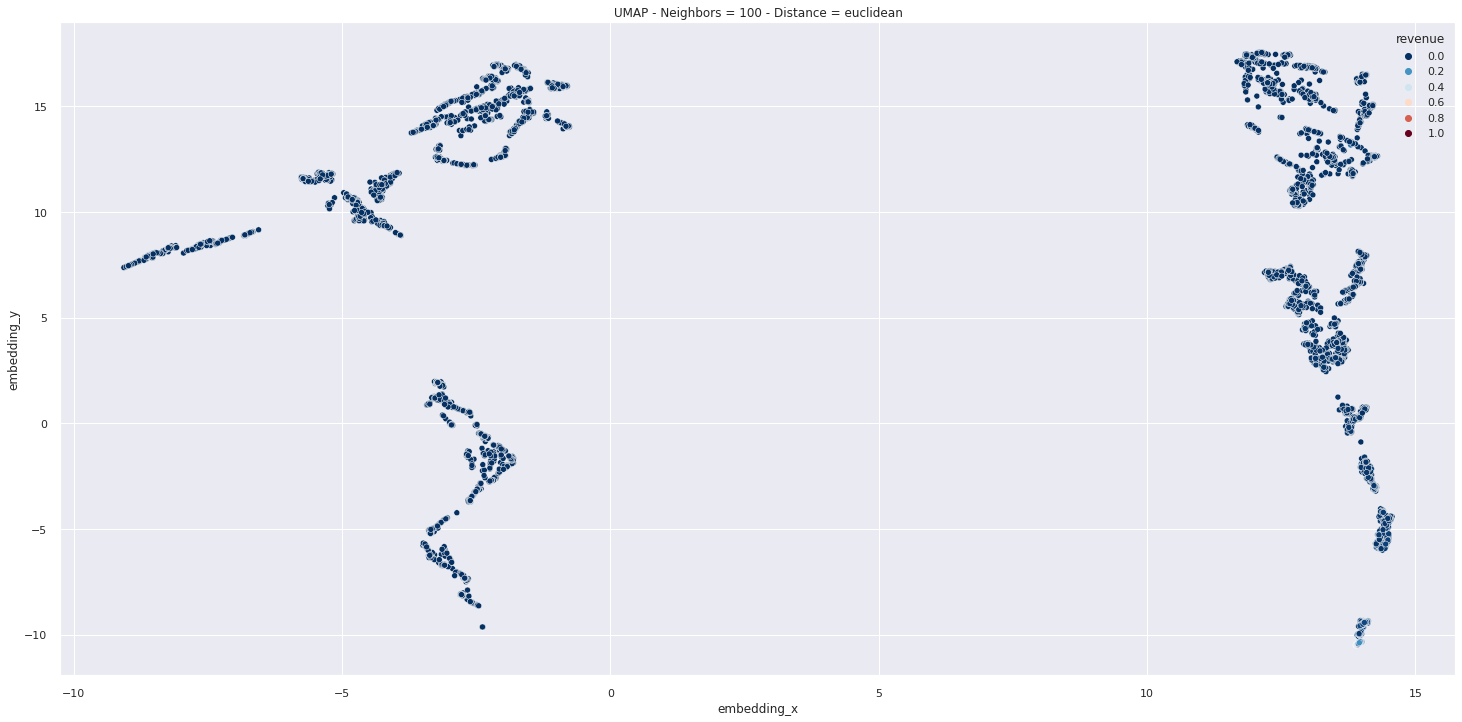

In [ ]:
# Euclidean Distance 
n_neighbors = 100
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'euclidean')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df6.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

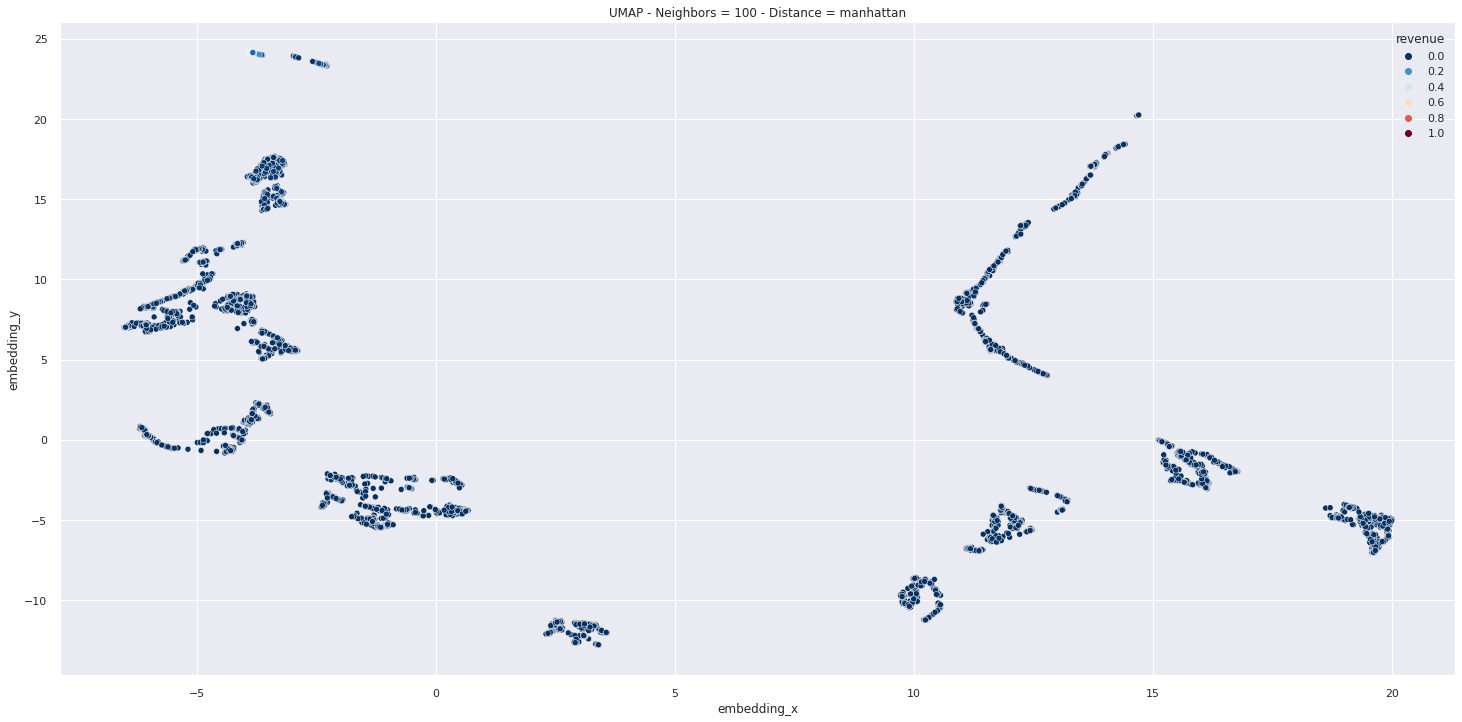

In [ ]:
# Manhattan Distance 
n_neighbors = 100
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df6.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

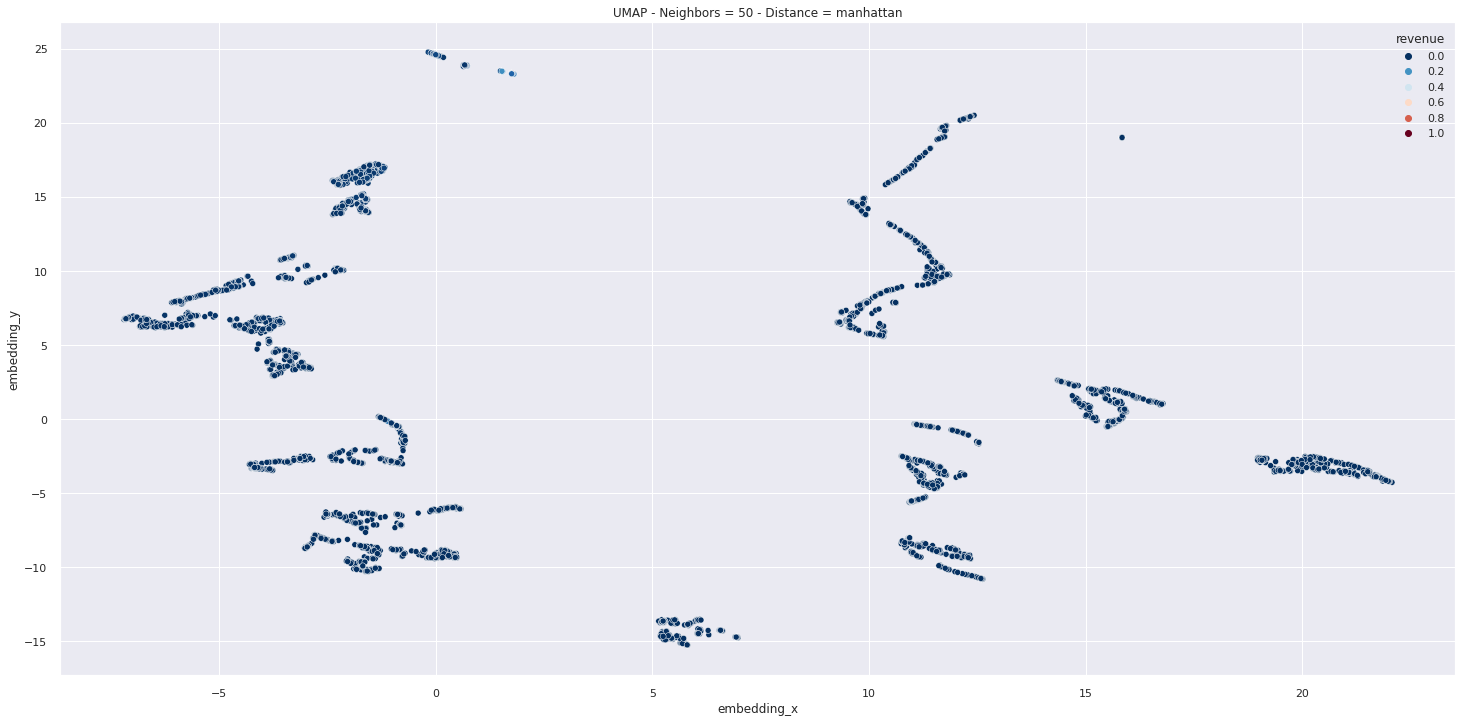

In [ ]:
n_neighbors = 50
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df6.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

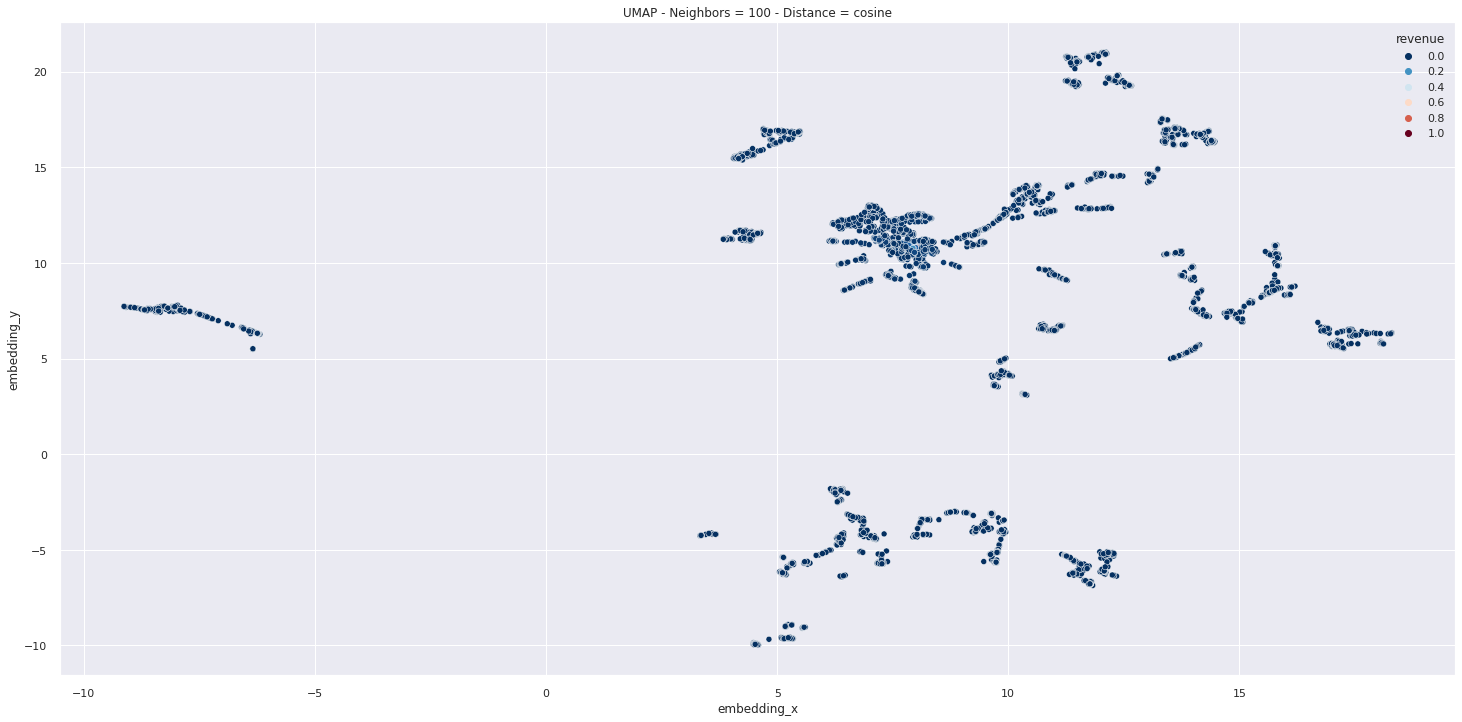

In [ ]:
n_neighbors = 100
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'cosine')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df6.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

### 6.2.2 Space with less features

In [ ]:
# cols_selected = ['qty_items','avg_ticket','num_returns','returns_revenue','avg_unique_prods','qty_returned','num_purchases','recency','frequency']# defining independent and dependent variable
cols_selected = ['recency',
                 'num_purchases',
                 'avg_ticket',
                 'frequency',
                 'revenue',
                 'qty_items',
                 'returns_revenue',
                 'qty_returned']

X = df5[cols_selected].drop(['revenue'], axis = 1).copy()
y = df5['revenue']

rf = RandomForestRegressor(random_state = 42, min_samples_split = 10) 
rf.fit(X, y)

# get leafs for each observation
df_leaf = pd.DataFrame( rf.apply(X) )

In [ ]:
# Feature importance
sorted( list(zip(rf.feature_importances_, rf.feature_names_in_)), reverse = True )

[(0.9589475988313737, 'qty_items'),
 (0.019725297900651317, 'avg_ticket'),
 (0.00592589765997691, 'returns_revenue'),
 (0.00516721090138476, 'qty_returned'),
 (0.004285281452449522, 'num_purchases'),
 (0.004199579770241277, 'frequency'),
 (0.001749133483922551, 'recency')]

In [ ]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,788,807,810,831,848,845,792,803,837,903,878,737,864,854,815,847,814,830,806,850,847,824,854,834,769,835,766,886,813,745,838,834,894,878,814,834,825,844,845,803,858,864,819,878,859,822,832,868,805,782,806,824,843,804,804,855,824,817,848,798,840,865,836,813,882,875,859,851,879,838,810,828,831,814,878,795,838,811,816,871,807,822,853,838,865,850,832,827,808,835,830,859,868,856,882,799,796,824,866,869
1,800,811,756,833,751,859,746,801,847,819,794,734,760,784,805,747,773,738,830,777,767,818,776,838,759,740,751,778,790,734,802,770,807,796,754,780,764,773,771,803,788,780,808,792,807,772,825,687,812,756,748,810,778,808,800,850,781,768,763,824,752,782,769,800,788,790,790,728,809,775,826,833,775,811,800,770,762,822,732,790,797,806,782,826,771,762,826,831,806,792,828,841,803,786,768,795,807,744,797,761
2,880,896,882,923,920,935,896,895,934,930,896,896,929,927,901,894,894,873,926,930,896,893,880,916,934,890,912,925,893,909,936,916,922,900,871,907,902,905,870,931,880,935,909,931,935,897,904,890,893,921,904,913,889,874,878,931,928,840,906,919,898,895,914,912,905,927,907,891,897,893,909,918,912,904,907,893,906,903,917,894,900,912,914,927,915,863,917,928,893,893,926,932,934,909,915,906,904,889,915,923
3,460,650,602,594,565,511,570,493,606,587,554,562,583,585,568,562,566,585,517,513,615,599,545,583,592,610,494,655,486,518,624,526,643,633,507,586,639,561,544,578,608,611,575,578,589,576,527,643,565,609,568,652,563,543,555,513,529,475,592,636,607,636,561,589,540,525,580,577,567,463,601,587,615,605,643,516,602,571,568,582,618,567,607,580,562,549,581,554,575,572,534,513,544,539,556,504,562,612,628,633
4,247,323,243,209,193,224,197,220,217,131,204,191,217,210,192,176,207,191,163,127,199,217,215,208,186,192,231,229,319,194,215,206,197,212,334,217,209,251,199,221,204,194,243,211,193,210,360,213,194,226,192,206,207,198,208,148,306,317,178,188,201,212,207,208,355,253,141,209,255,117,209,206,180,199,215,317,199,221,203,194,273,268,197,154,187,273,201,209,198,202,187,124,211,205,175,253,192,196,206,210


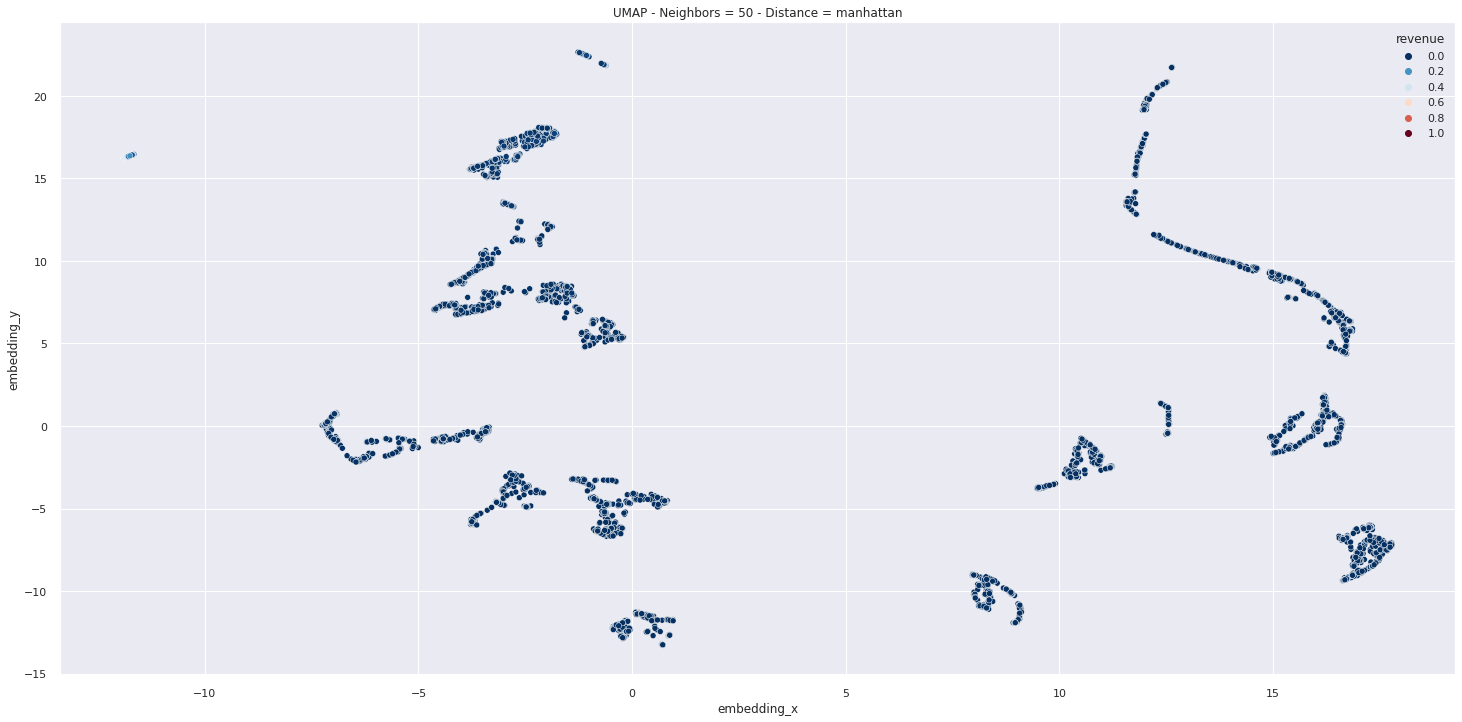

In [ ]:
# Manhattan Distance 
n_neighbors = 50
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df7.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

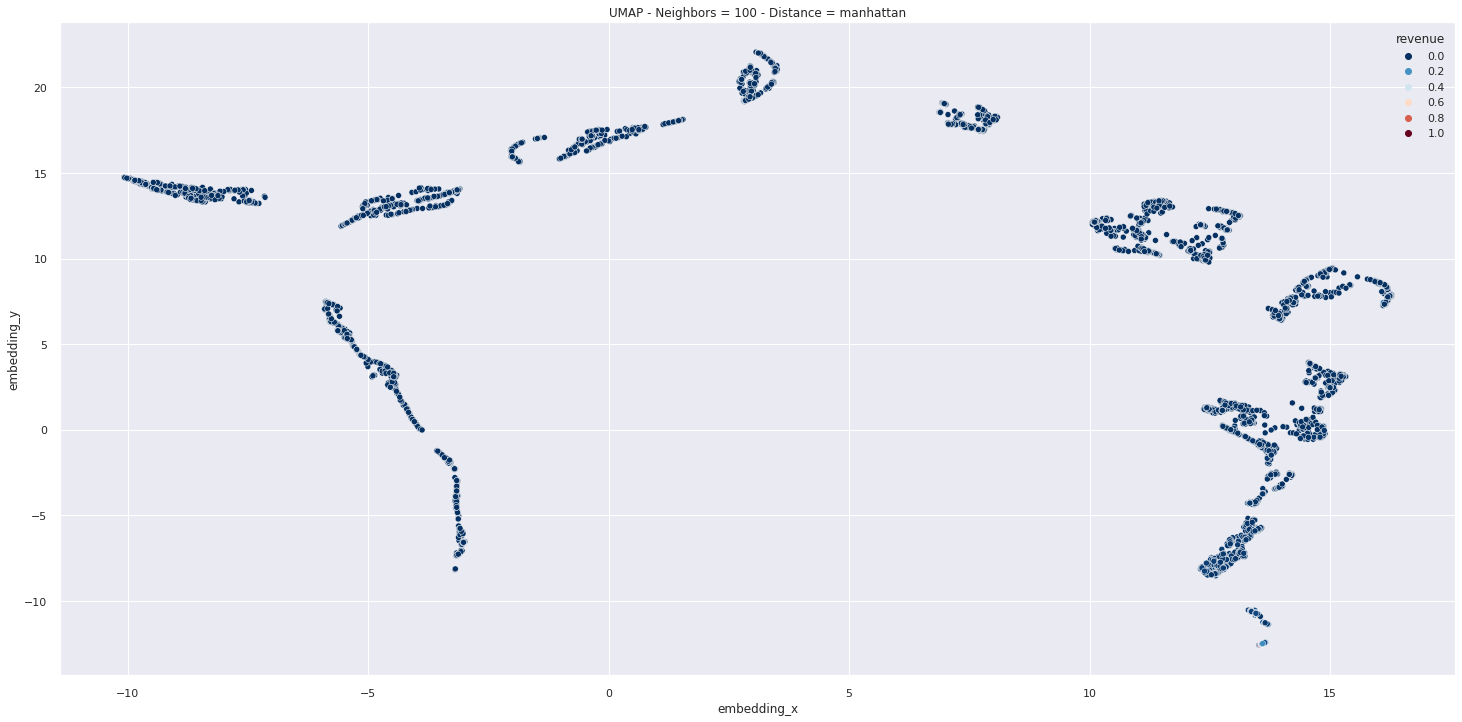

In [ ]:
# Manhattan Distance 
n_neighbors = 100
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df7.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

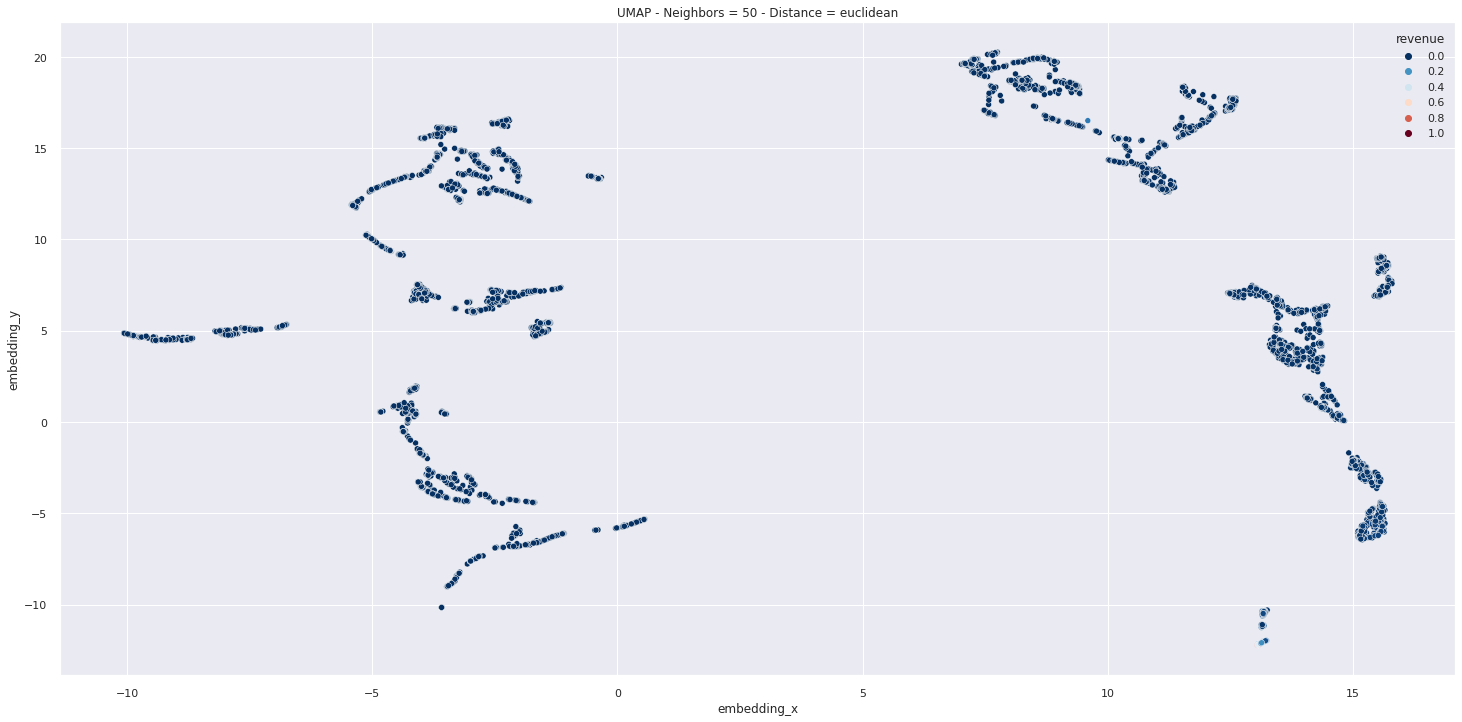

In [ ]:
# Cosine Distance 
n_neighbors = 50
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'euclidean')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric
metric = umap.metric

df_tree = df7.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

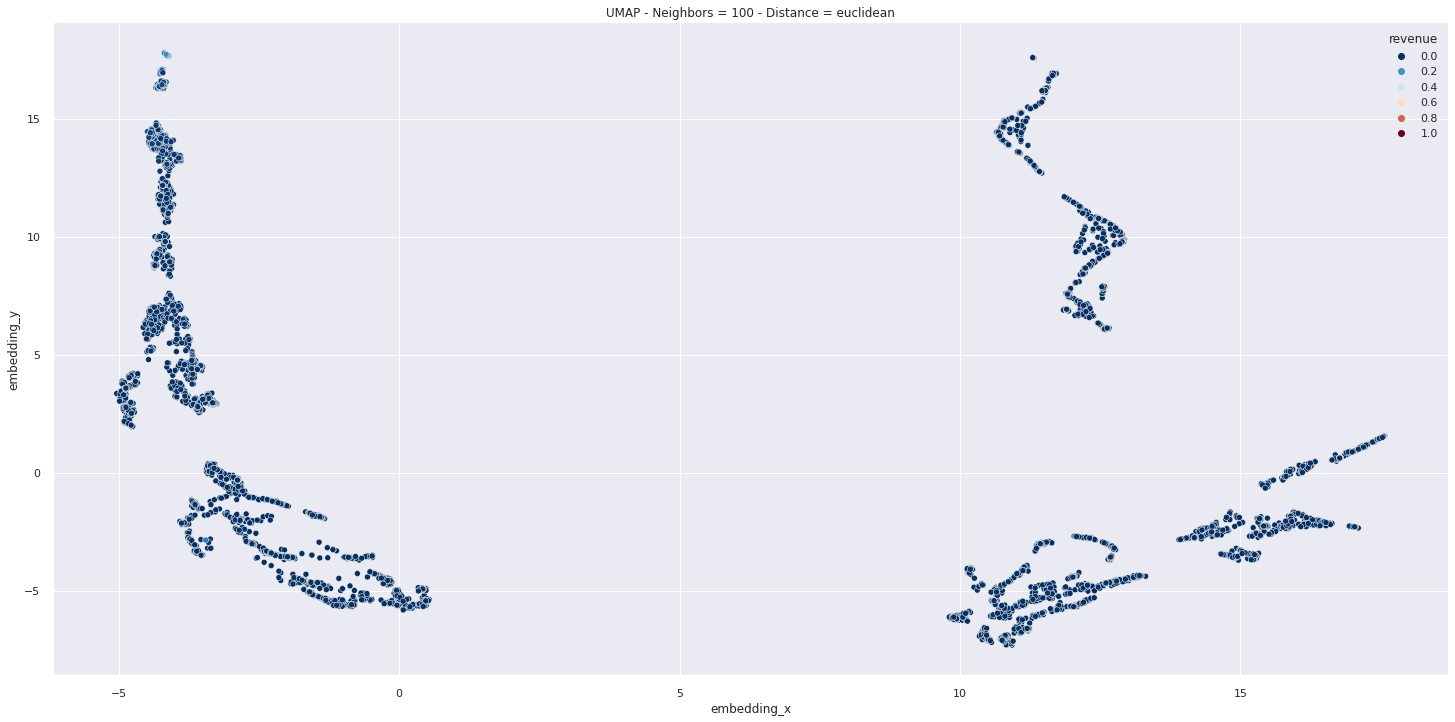

In [ ]:
n_neighbors = 100
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'euclidean')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric
metric = umap.metric

df_tree = df7.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

### 6.2.3 Space with less features and min_sample_split = 20

In [ ]:
# cols_selected = ['qty_items','avg_ticket','num_returns','returns_revenue','avg_unique_prods','qty_returned','num_purchases','recency','frequency']# defining independent and dependent variable
cols_selected = ['recency',
                 'num_purchases',
                 'frequency',
                 'revenue',
                 'qty_items',
                 'returns_revenue',
                 'qty_returned']

X = df7[cols_selected].drop(['revenue'], axis = 1).copy()
y = df7['revenue']

rf = RandomForestRegressor(random_state = 42, min_samples_split = 20) 
rf.fit(X, y)

# get leafs for each observation
df_leaf = pd.DataFrame( rf.apply(X) )

In [ ]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,571,608,595,611,526,563,570,542,585,625,581,502,584,602,579,623,543,579,547,593,591,571,606,557,527,579,538,626,556,523,549,639,625,613,577,561,558,617,613,554,609,585,581,593,610,554,622,600,612,552,609,594,616,585,606,607,585,563,591,578,614,606,612,573,606,603,600,612,559,599,615,560,547,553,601,615,620,603,585,645,582,566,627,560,616,609,579,613,565,576,562,582,587,628,601,584,582,583,584,639
1,559,600,569,605,518,558,558,542,585,569,521,501,529,560,565,526,499,519,541,545,539,569,565,550,522,519,530,558,511,517,524,603,568,562,533,519,516,555,567,554,577,545,566,529,573,512,617,480,594,543,566,569,566,576,603,596,563,498,538,564,554,566,571,565,552,540,522,557,514,551,604,552,513,535,541,592,571,599,548,573,569,522,576,504,562,552,541,568,552,544,556,568,562,577,536,575,582,535,553,539
2,620,657,643,666,622,610,640,612,628,641,590,575,619,624,621,667,589,605,607,641,617,616,621,591,625,619,634,659,589,615,611,681,641,627,616,603,616,668,628,627,615,623,628,626,651,591,663,629,661,634,659,659,647,624,653,643,637,595,619,642,646,619,677,615,620,636,639,636,570,620,665,601,579,604,617,691,663,656,642,659,641,623,669,616,647,618,622,645,629,615,612,633,644,657,608,667,654,615,620,660
3,352,489,469,427,374,364,424,374,444,428,390,396,390,386,405,474,387,429,367,396,414,400,431,388,419,422,374,482,343,373,403,431,462,450,355,379,449,418,438,424,450,425,435,391,436,410,407,451,417,436,456,358,412,410,425,370,379,353,407,439,475,472,439,416,400,372,401,417,386,376,444,415,406,398,439,399,460,427,421,461,448,422,467,390,420,379,441,460,400,416,387,381,400,400,390,376,424,452,440,473
4,66,117,108,94,76,94,95,113,142,104,121,86,124,48,88,104,53,66,71,108,79,90,43,46,44,35,78,49,92,76,50,42,37,106,116,68,42,77,126,40,73,87,95,91,83,40,78,80,72,70,38,128,47,63,58,34,96,90,83,138,62,110,94,87,84,38,102,117,36,85,54,84,85,76,70,39,80,104,106,90,95,41,107,40,88,105,101,92,77,101,97,117,94,94,59,83,90,84,38,102


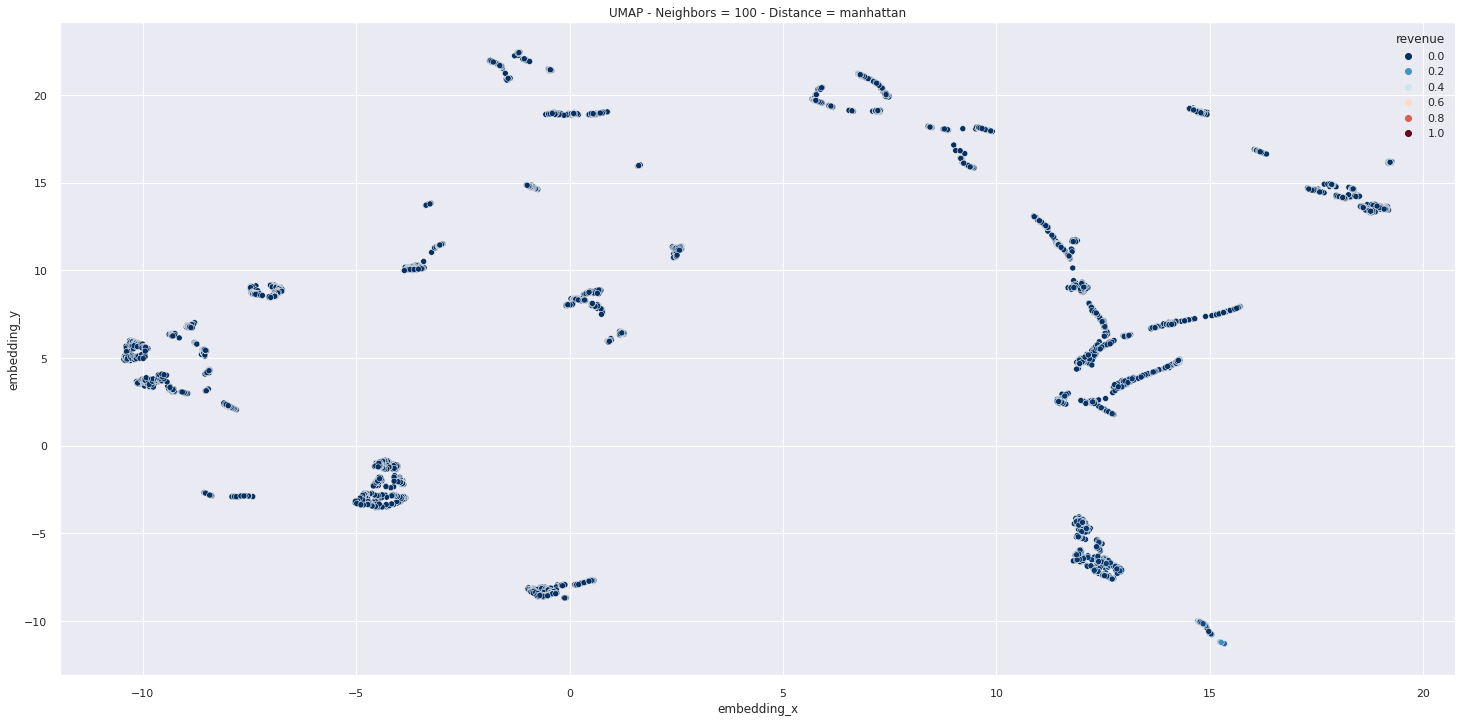

In [ ]:
# Manhattan Distance 
n_neighbors = 100
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df7.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

In [ ]:
# cols_selected = ['qty_items','avg_ticket','num_returns','returns_revenue','avg_unique_prods','qty_returned','num_purchases','recency','frequency']# defining independent and dependent variable
cols_selected = ['recency',
                 'num_purchases',
                 'frequency',
                 'revenue',
                 'qty_items',
                 'returns_revenue',
                 'qty_returned']

X = df5[cols_selected].drop(['revenue'], axis = 1).copy()
y = df5['revenue']

rf = RandomForestRegressor(random_state = 42, min_samples_split = 20) 
rf.fit(X, y)

# get leafs for each observation
df_leaf2 = pd.DataFrame( rf.apply(X) )

In [ ]:
df_leaf2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,571,608,595,611,526,563,570,542,585,625,581,502,584,605,579,623,543,579,547,593,591,571,606,557,527,579,538,626,556,523,549,639,625,613,577,561,558,617,613,554,609,585,581,593,610,554,622,600,612,552,609,594,616,585,606,607,585,563,591,578,614,606,612,573,606,603,600,612,559,599,615,560,547,553,601,615,620,603,585,645,582,566,627,560,616,609,579,613,565,576,562,582,587,628,601,584,582,585,584,637
1,559,600,569,605,518,558,558,542,585,569,521,501,529,560,565,526,499,519,541,545,539,569,565,550,522,519,530,558,511,517,524,603,568,562,533,519,516,555,567,554,577,545,566,529,573,512,617,480,594,543,566,569,566,576,603,596,563,498,538,564,554,566,571,565,552,540,522,557,514,551,604,552,513,535,541,592,571,599,548,573,569,522,576,504,562,552,541,568,552,544,556,568,562,577,536,575,582,535,553,539
2,620,657,643,666,622,610,640,612,628,641,590,575,619,624,621,667,589,605,607,641,617,616,621,591,625,619,634,660,589,615,611,681,641,627,616,603,616,667,628,627,615,623,628,626,651,591,663,629,661,634,659,659,647,624,653,643,637,595,619,642,646,619,677,615,620,636,639,636,570,620,665,600,579,604,617,690,663,656,642,659,641,623,669,616,647,618,622,645,629,615,612,633,644,657,608,666,654,615,620,660
3,352,489,469,427,374,364,424,374,444,428,390,396,390,386,405,474,387,429,367,396,414,400,431,388,419,422,374,482,343,373,403,431,462,450,355,379,449,418,438,424,450,425,435,391,436,410,407,451,417,436,456,358,412,410,425,370,379,353,407,439,475,472,439,416,400,372,401,417,386,376,444,415,406,398,439,399,460,427,421,461,448,422,467,390,420,379,441,460,400,416,387,381,400,400,390,376,424,452,440,473
4,66,117,108,94,76,94,95,113,142,104,121,86,124,48,88,104,53,66,71,108,79,90,43,46,44,35,78,49,92,76,50,42,37,106,116,68,42,77,126,40,73,87,95,91,83,40,78,80,72,70,38,113,47,63,58,34,96,90,83,138,62,110,94,87,83,38,102,117,36,85,54,84,85,76,70,39,80,104,106,97,95,41,107,40,88,105,101,92,77,101,97,117,94,94,59,83,90,84,38,102


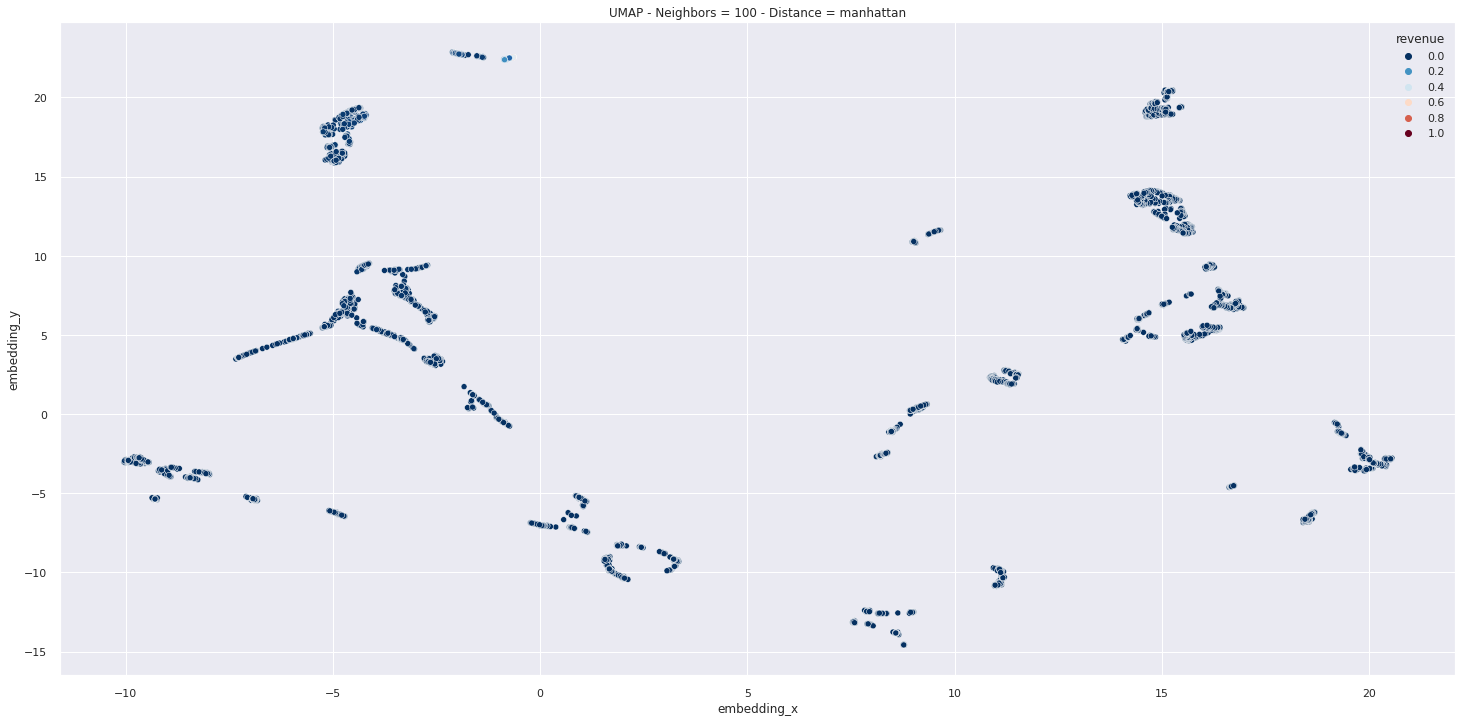

In [ ]:
# Manhattan Distance 
n_neighbors = 100
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df7.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

## 6.3 Selected Embedding Space

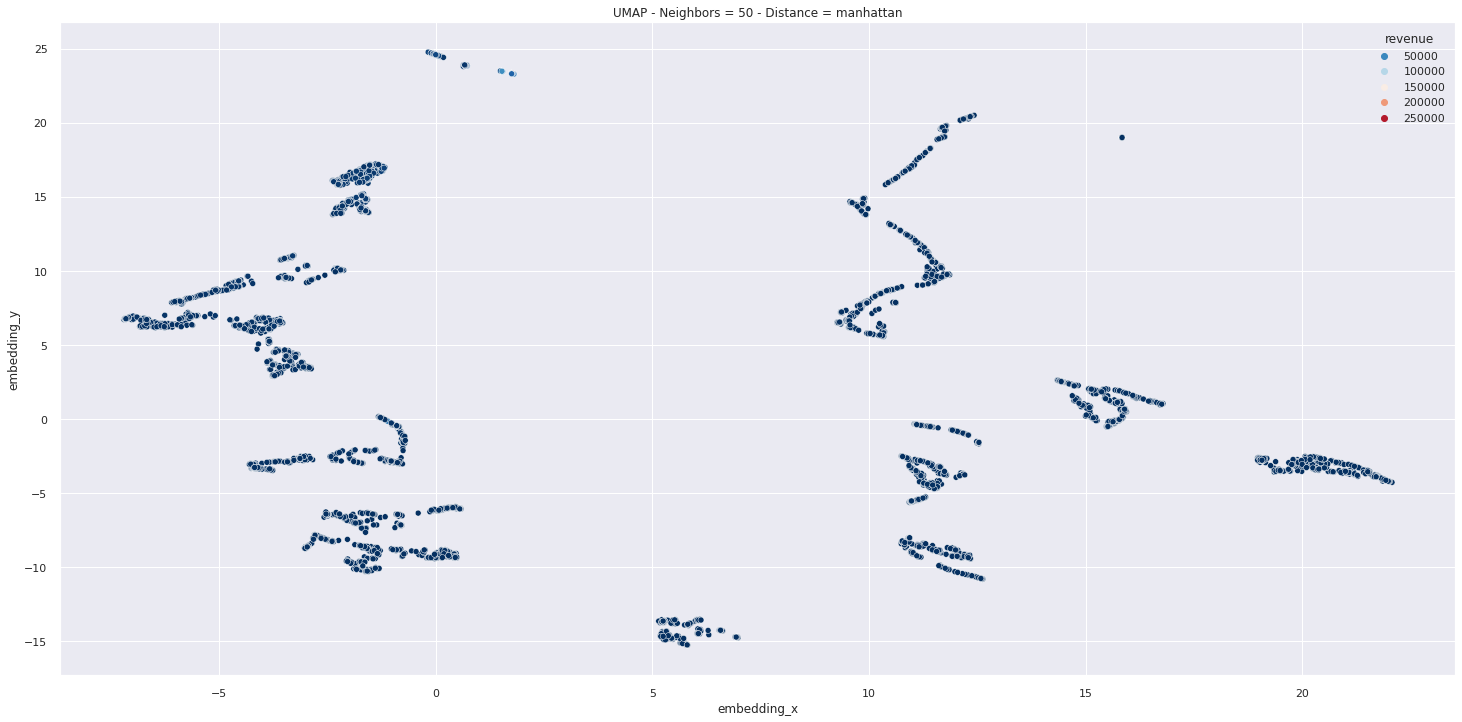

In [ ]:
# selecting most important features. Removing ('avg_basket_size', 'avg_days_bw_purchases', 'avg_return_revenue', 'date_range)
cols_selected = ['qty_items','avg_ticket','num_returns','returns_revenue','avg_unique_prods','qty_returned','num_purchases','recency','frequency']

# defining independent and dependent variable
X = df5[cols_selected].copy()
y = df5['revenue']

# defining random forest regresor for embedding
rf = RandomForestRegressor(random_state = 42, min_samples_split = 20) 
rf.fit(X, y)

# get leafs for each observation
df_leaf = pd.DataFrame( rf.apply(X) )

# defining umap algorithm
n_neighbors = 50
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

# storing embedding results on a dataframe
df_tree = df5.copy()
# df_tree = pd.DataFrame()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

# ploting results
cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

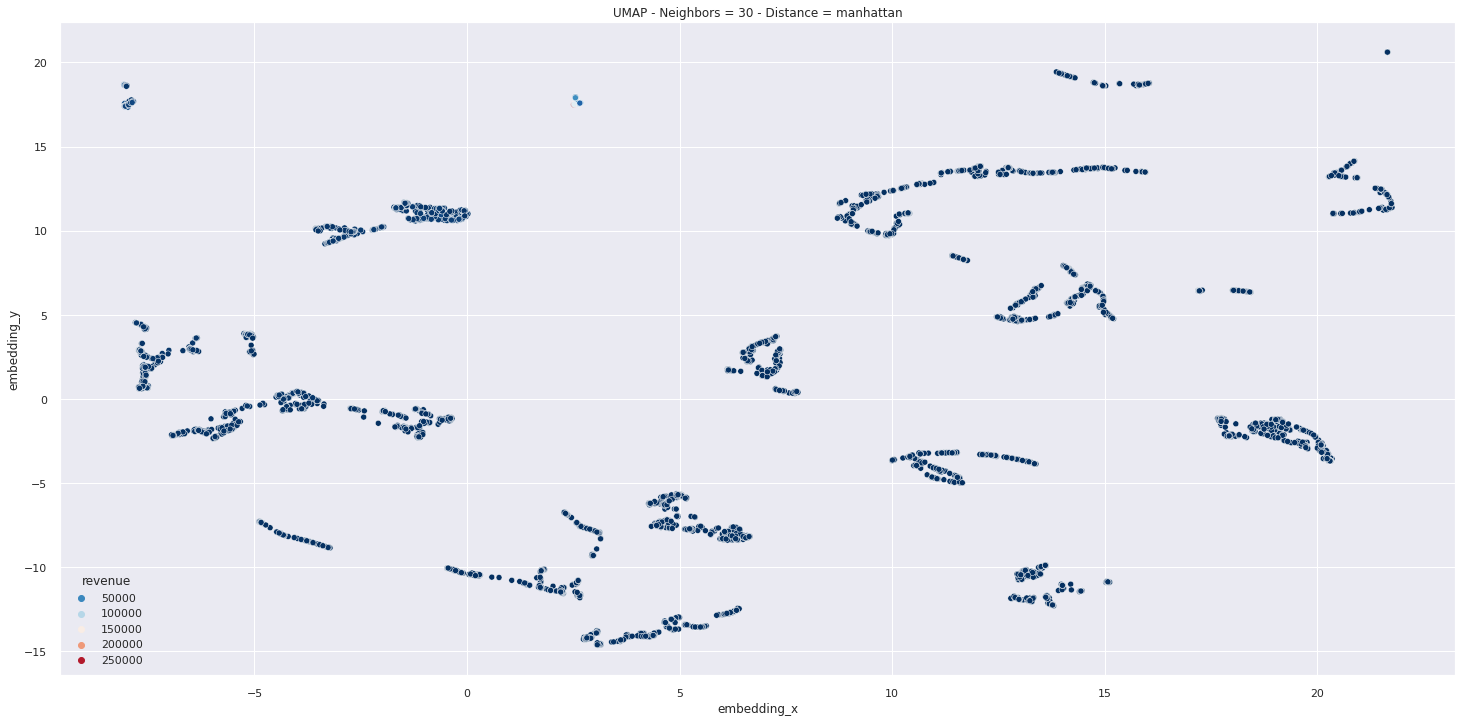

In [ ]:

# defining umap algorithm
n_neighbors = 30
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

# storing embedding results on a dataframe
df_tree = df5.copy()
# df_tree = pd.DataFrame()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

# ploting results
cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

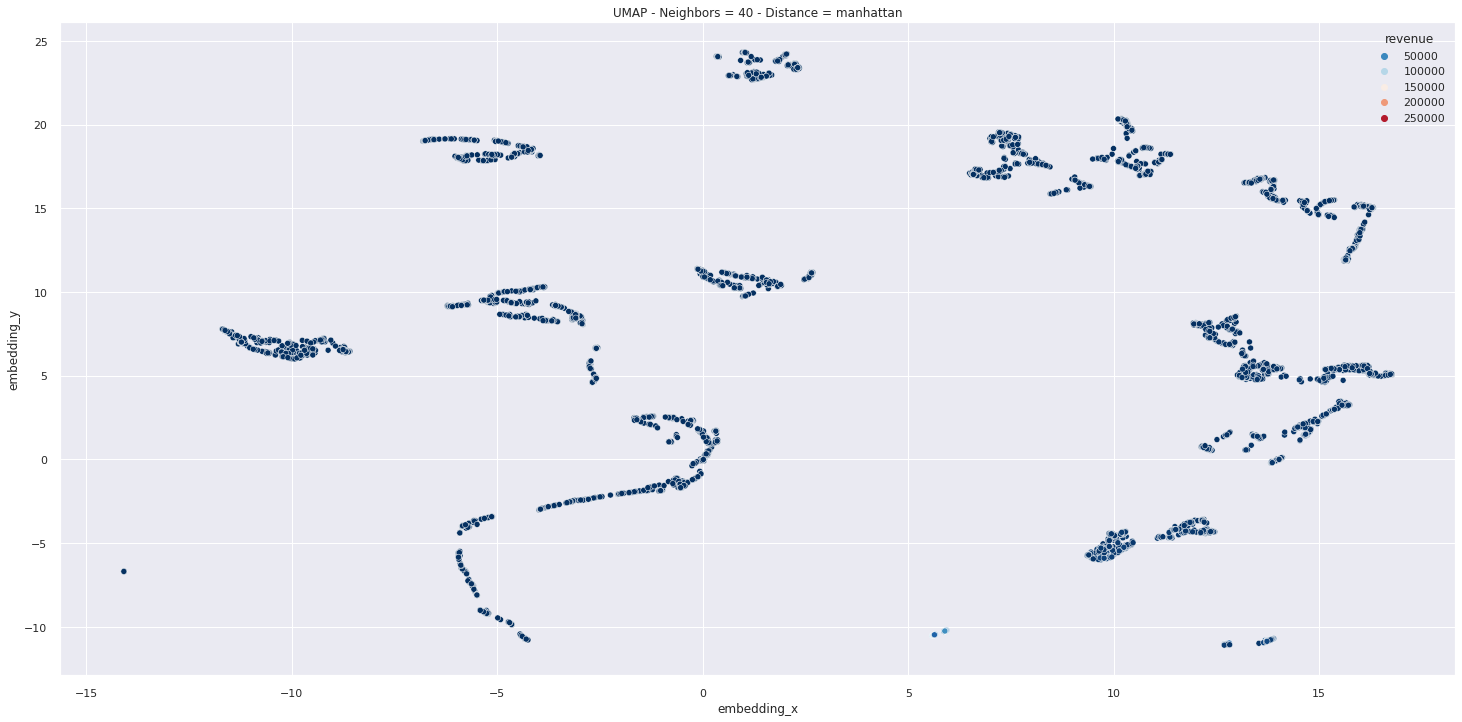

In [ ]:
# defining umap algorithm
n_neighbors = 40
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

# storing embedding results on a dataframe
df_tree = df5.copy()
# df_tree = pd.DataFrame()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

# ploting results
cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

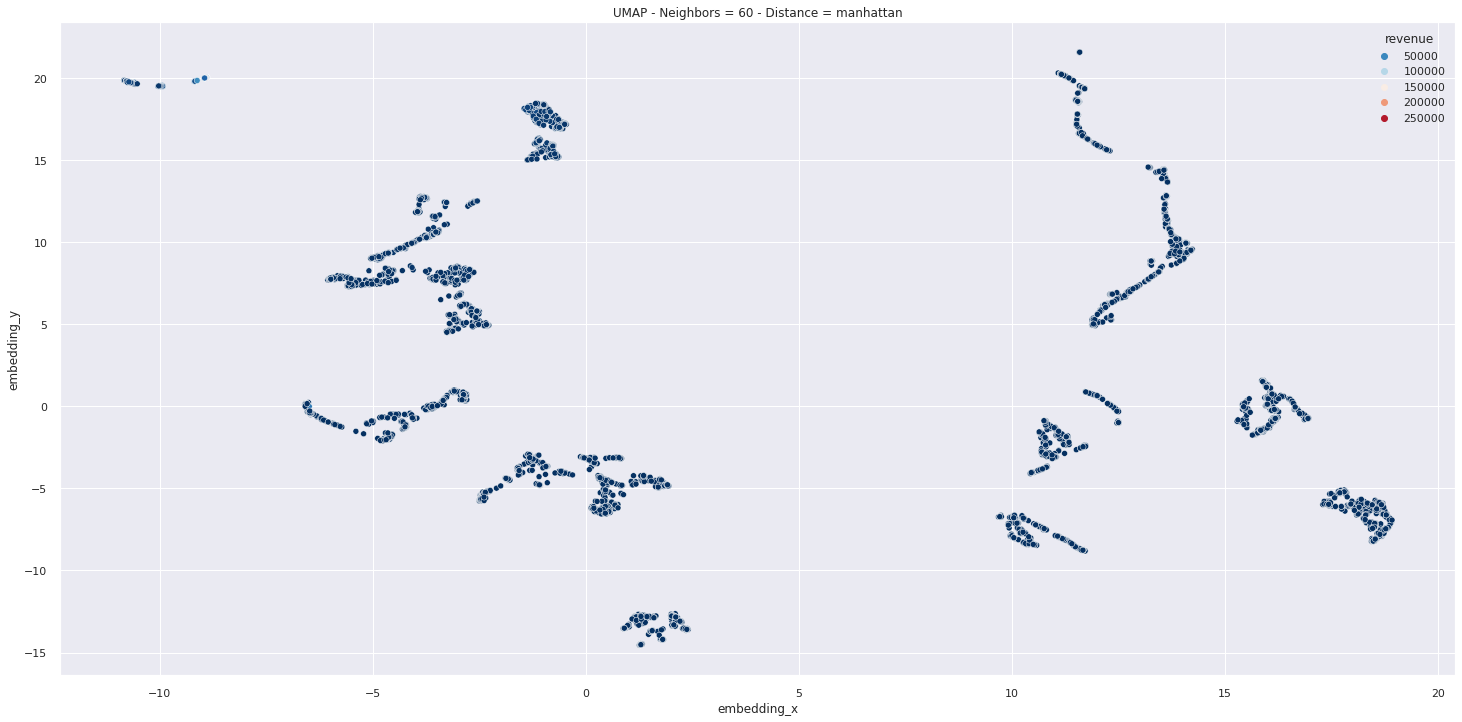

In [ ]:
# defining umap algorithm
n_neighbors = 60
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

# storing embedding results on a dataframe
df_tree = df5.copy()
# df_tree = pd.DataFrame()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

# ploting results
cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);